<a href="https://colab.research.google.com/github/ammad19/DL_1Assignment/blob/main/ionosphere_data_problem_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
import tensorflow as tf
df = read_csv('ionosphere_data.csv')
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
n_features = X.shape[1]
# define model
model = Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#model.compile(optimizer='adam', loss='binary_crossentropy')
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test,y_test))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
model.fit(X_train, y_train,epochs=200,batch_size=32)

Epoch 1/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6314
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7133
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7543
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7831
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8281
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8473
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8628
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.9014
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8917
Epoch 10/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.9339
Epoch 11/200
8/8 [===========

In [20]:
results = model.evaluate(X_test, y_test)
results

4/4 [==============================] - 0s 3ms/step - loss: 0.2736 - accuracy: 0.9310


[0.2736067473888397, 0.931034505367279]

In [21]:
# predict test set
yhat = model.predict_classes(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)


Accuracy: 0.931


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


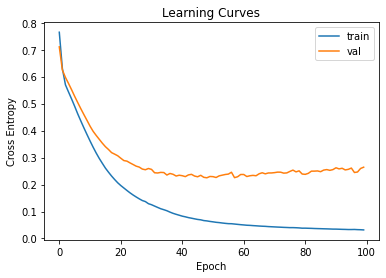

In [23]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()